In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print(tf.__version__)
from tensorflow.keras.layers import Input, Activation,Dropout
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

2.4.1


In [ ]:
#delete this if run with jupyter notebook
from google.colab import files 
  
  
uploaded = files.upload()

Saving row_size25_vector_size2000.csv to row_size25_vector_size2000.csv


In [ ]:
dataset = pd.read_csv('row_size25_vector_size2000.csv')

In [ ]:
#delete this if run with jupyter notebook
import io 
  
dataset = pd.read_csv(io.BytesIO(uploaded['row_size25_vector_size2000.csv'])) 


In [ ]:
dataset.head()

,time_change,x_change,y_change,z_change,phi_change,theta_change,psi_change,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,accelerometer_reading_x_10,accelerometer_reading_x_11,accelerometer_reading_x_12,accelerometer_reading_x_13,accelerometer_reading_x_14,accelerometer_reading_x_15,accelerometer_reading_x_16,accelerometer_reading_x_17,accelerometer_reading_x_18,accelerometer_reading_x_19,accelerometer_reading_x_20,accelerometer_reading_x_21,accelerometer_reading_x_22,accelerometer_reading_x_23,accelerometer_reading_x_24,accelerometer_reading_y_0,accelerometer_reading_y_1,accelerometer_reading_y_2,accelerometer_reading_y_3,accelerometer_reading_y_4,accelerometer_reading_y_5,accelerometer_reading_y_6,accelerometer_reading_y_7,...,gyroscope_reading_theta_10,gyroscope_reading_theta_11,gyroscope_reading_theta_12,gyroscope_reading_theta_13,gyroscope_reading_theta_14,gyroscope_reading_theta_15,gyroscope_reading_theta_16,gyroscope_reading_theta_17,gyroscope_reading_theta_18,gyroscope_reading_theta_19,gyroscope_reading_theta_20,gyroscope_reading_theta_21,gyroscope_reading_theta_22,gyroscope_reading_theta_23,gyroscope_reading_theta_24,gyroscope_reading_psi_0,gyroscope_reading_psi_1,gyroscope_reading_psi_2,gyroscope_reading_psi_3,gyroscope_reading_psi_4,gyroscope_reading_psi_5,gyroscope_reading_psi_6,gyroscope_reading_psi_7,gyroscope_reading_psi_8,gyroscope_reading_psi_9,gyroscope_reading_psi_10,gyroscope_reading_psi_11,gyroscope_reading_psi_12,gyroscope_reading_psi_13,gyroscope_reading_psi_14,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,0.75,-0.052241,0.029944,-0.006582,0.000533,-2.336809e-04,-4.840043e-06,0.073937,-0.068899,-0.035242,-0.015964,0.220823,-0.103364,-0.416399,0.483395,-0.085621,-0.435953,-0.016228,0.065729,-0.296382,0.493742,1.644498,-1.436581,0.003517,0.045664,0.036326,-0.066082,-0.171316,-0.087108,0.332163,0.242042,-0.787900,-0.043375,0.039010,0.019604,0.058258,-0.127684,0.058670,0.238338,-0.277961,...,6.541181e-04,-2.828239e-04,-1.464698e-03,1.746913e-03,7.748408e-03,-6.082735e-03,-1.925785e-04,8.934936e-06,2.524465e-04,-1.298187e-04,-8.329275e-04,-1.123908e-03,1.367052e-03,1.345012e-02,-0.001694,2.256210e-02,-6.259816e-06,-3.083582e-06,-3.642297e-06,1.831104e-05,-6.322275e-06,-3.869048e-05,4.553757e-05,3.540495e-03,-4.053580e-05,-1.095454e-06,6.347403e-06,-2.712759e-05,4.595285e-05,1.519545e-04,-1.324834e-04,4.427150e-07,3.820587e-06,3.520172e-06,-5.862252e-06,-1.547010e-05,-7.641495e-06,3.049832e-05,1.796078e-02,-0.000071
1,0.75,0.034440,-0.000003,-0.000006,-0.000316,-1.156129e-08,-1.284978e-08,0.107017,0.353534,-0.423367,0.092812,-0.023570,0.170603,-1.337842,1.205995,0.035168,-0.074843,0.108822,-0.196391,0.102019,0.045292,0.296996,-0.403318,0.176329,-0.173299,0.140056,0.240081,-0.369357,0.162377,-0.003140,0.288754,-0.361949,0.000043,-0.000382,0.000257,0.000080,0.000026,-0.000167,0.001299,0.043770,...,-8.299122e-09,5.339935e-08,2.081427e-03,-2.670261e-08,-1.184613e-07,6.517251e-08,3.944750e-09,5.233783e-08,1.022625e-09,-1.038754e-07,6.711688e-08,9.651071e-09,-8.087828e-09,-8.851906e-08,0.040205,4.942689e-09,-3.234622e-07,3.159834e-02,-2.414688e-08,1.719485e-02,-4.201821e-08,5.705964e-08,8.377956e-09,1.853659e-08,-8.573549e-09,-2.696648e-08,7.014434e-08,1.796861e-02,-7.735424e-08,-1.012918e-07,2.573812e-07,-4.399851e-08,-4.395591e-08,2.447615e-09,-1.695027e-07,2.184060e-07,2.214019e-08,-1.806190e-07,-8.568812e-08,0.028813
2,0.75,-0.047077,-0.006330,0.002504,0.000463,2.307085e-05,1.117865e-03,-0.848611,0.973650,0.260805,0.021154,-0.254084,-0.260126,0.314996,-0.311785,0.303587,-0.004056,-0.126172,0.227168,0.

In [ ]:
dataset = dataset*10000
dataset

,time_change,x_change,y_change,z_change,phi_change,theta_change,psi_change,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,accelerometer_reading_x_10,accelerometer_reading_x_11,accelerometer_reading_x_12,accelerometer_reading_x_13,accelerometer_reading_x_14,accelerometer_reading_x_15,accelerometer_reading_x_16,accelerometer_reading_x_17,accelerometer_reading_x_18,accelerometer_reading_x_19,accelerometer_reading_x_20,accelerometer_reading_x_21,accelerometer_reading_x_22,accelerometer_reading_x_23,accelerometer_reading_x_24,accelerometer_reading_y_0,accelerometer_reading_y_1,accelerometer_reading_y_2,accelerometer_reading_y_3,accelerometer_reading_y_4,accelerometer_reading_y_5,accelerometer_reading_y_6,accelerometer_reading_y_7,...,gyroscope_reading_theta_10,gyroscope_reading_theta_11,gyroscope_reading_theta_12,gyroscope_reading_theta_13,gyroscope_reading_theta_14,gyroscope_reading_theta_15,gyroscope_reading_theta_16,gyroscope_reading_theta_17,gyroscope_reading_theta_18,gyroscope_reading_theta_19,gyroscope_reading_theta_20,gyroscope_reading_theta_21,gyroscope_reading_theta_22,gyroscope_reading_theta_23,gyroscope_reading_theta_24,gyroscope_reading_psi_0,gyroscope_reading_psi_1,gyroscope_reading_psi_2,gyroscope_reading_psi_3,gyroscope_reading_psi_4,gyroscope_reading_psi_5,gyroscope_reading_psi_6,gyroscope_reading_psi_7,gyroscope_reading_psi_8,gyroscope_reading_psi_9,gyroscope_reading_psi_10,gyroscope_reading_psi_11,gyroscope_reading_psi_12,gyroscope_reading_psi_13,gyroscope_reading_psi_14,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,7500.0,-522.410490,299.443268,-65.823851,5.325198,-2.336809,-0.048400,739.373812,-688.986303,-352.420291,-159.641374,2208.229093,-1033.637579,-4163.990937,4833.950705,-856.205052,-4359.525336,-162.282515,657.291757,-2963.817476,4937.423571,16444.977586,-14365.806347,35.171098,456.642353,363.263005,-660.818191,-1713.156672,-871.080567,3321.631306,2420.423111,-7878.998274,-433.748118,390.099855,196.040602,582.578516,-1276.838209,586.702603,2383.381745,-2779.611287,...,6.541181,-2.828239,-14.646981,17.469130,77.484078,-60.827349,-1.925785,0.089349,2.524465,-1.298187,-8.329275,-11.239085,13.670521,134.501219,-16.940419,225.621025,-0.062598,-0.030836,-0.036423,0.183110,-0.063223,-0.386905,0.455376,35.404952,-0.405358,-0.010955,0.063474,-0.271276,0.459528,1.519545,-1.324834,0.004427,0.038206,0.035202,-0.058623,-0.154701,-0.076415,0.304983,179.607844,-0.712321
1,7500.0,344.400482,-0.031161,-0.061757,-3.159365,-0.000116,-0.000128,1070.172912,3535.344166,-4233.668719,928.123702,-235.698061,1706.025976,-13378.417097,12059.949656,351.675120,-748.425094,1088.224973,-1963.907526,1020.188612,452.924600,2969.961599,-4033.182463,1763.285823,-1732.987738,1400.555974,2400.806715,-3693.565759,1623.773733,-31.402854,2887.537938,-3619.485117,0.430556,-3.824325,2.565475,0.796641,0.258092,-1.672025,12.990627,437.698680,...,-0.000083,0.000534,20.814272,-0.000267,-0.001185,0.000652,0.000039,0.000523,0.000010,-0.001039,0.000671,0.000097,-0.000081,-0.000885,402.046606,0.000049,-0.003235,315.983449,-0.000241,171.948543,-0.000420,0.000571,0.000084,0.000185,-0.000086,-0.000270,0.000701,179.686110,-0.000774,-0.001013,0.002574,-0.000440,-0.000440,0.000024,-0.001695,0.002184,0.000221,-0.001806,-0.000857,288.128414
2,7500.0,-470.774860,-63.298530,25.042580,4.627001,0.230709,11.178647,-8486.106537,9736.497140,2608.054965,211.538676,-2540.839055,-2601.257807,3149.962463,-3117.847069,3035.873566,-40.558145,-1261.717182,2271.682545,987.803527,-6768.298712,3979.796731,1449.006057,-1230.985309,-588.035445,-164.331029,674.003234,32

In [ ]:
dataset.head()

,time_change,x_change,y_change,z_change,phi_change,theta_change,psi_change,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,accelerometer_reading_x_10,accelerometer_reading_x_11,accelerometer_reading_x_12,accelerometer_reading_x_13,accelerometer_reading_x_14,accelerometer_reading_x_15,accelerometer_reading_x_16,accelerometer_reading_x_17,accelerometer_reading_x_18,accelerometer_reading_x_19,accelerometer_reading_x_20,accelerometer_reading_x_21,accelerometer_reading_x_22,accelerometer_reading_x_23,accelerometer_reading_x_24,accelerometer_reading_y_0,accelerometer_reading_y_1,accelerometer_reading_y_2,accelerometer_reading_y_3,accelerometer_reading_y_4,accelerometer_reading_y_5,accelerometer_reading_y_6,accelerometer_reading_y_7,...,gyroscope_reading_theta_10,gyroscope_reading_theta_11,gyroscope_reading_theta_12,gyroscope_reading_theta_13,gyroscope_reading_theta_14,gyroscope_reading_theta_15,gyroscope_reading_theta_16,gyroscope_reading_theta_17,gyroscope_reading_theta_18,gyroscope_reading_theta_19,gyroscope_reading_theta_20,gyroscope_reading_theta_21,gyroscope_reading_theta_22,gyroscope_reading_theta_23,gyroscope_reading_theta_24,gyroscope_reading_psi_0,gyroscope_reading_psi_1,gyroscope_reading_psi_2,gyroscope_reading_psi_3,gyroscope_reading_psi_4,gyroscope_reading_psi_5,gyroscope_reading_psi_6,gyroscope_reading_psi_7,gyroscope_reading_psi_8,gyroscope_reading_psi_9,gyroscope_reading_psi_10,gyroscope_reading_psi_11,gyroscope_reading_psi_12,gyroscope_reading_psi_13,gyroscope_reading_psi_14,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,7500.0,-522.410490,299.443268,-65.823851,5.325198,-2.336809,-0.048400,739.373812,-688.986303,-352.420291,-159.641374,2208.229093,-1033.637579,-4163.990937,4833.950705,-856.205052,-4359.525336,-162.282515,657.291757,-2963.817476,4937.423571,16444.977586,-14365.806347,35.171098,456.642353,363.263005,-660.818191,-1713.156672,-871.080567,3321.631306,2420.423111,-7878.998274,-433.748118,390.099855,196.040602,582.578516,-1276.838209,586.702603,2383.381745,-2779.611287,...,6.541181,-2.828239,-14.646981,17.469130,77.484078,-60.827349,-1.925785,0.089349,2.524465,-1.298187,-8.329275,-11.239085,13.670521,134.501219,-16.940419,225.621025,-0.062598,-0.030836,-0.036423,0.183110,-0.063223,-0.386905,0.455376,35.404952,-0.405358,-0.010955,0.063474,-0.271276,0.459528,1.519545,-1.324834,0.004427,0.038206,0.035202,-0.058623,-0.154701,-0.076415,0.304983,179.607844,-0.712321
1,7500.0,344.400482,-0.031161,-0.061757,-3.159365,-0.000116,-0.000128,1070.172912,3535.344166,-4233.668719,928.123702,-235.698061,1706.025976,-13378.417097,12059.949656,351.675120,-748.425094,1088.224973,-1963.907526,1020.188612,452.924600,2969.961599,-4033.182463,1763.285823,-1732.987738,1400.555974,2400.806715,-3693.565759,1623.773733,-31.402854,2887.537938,-3619.485117,0.430556,-3.824325,2.565475,0.796641,0.258092,-1.672025,12.990627,437.698680,...,-0.000083,0.000534,20.814272,-0.000267,-0.001185,0.000652,0.000039,0.000523,0.000010,-0.001039,0.000671,0.000097,-0.000081,-0.000885,402.046606,0.000049,-0.003235,315.983449,-0.000241,171.948543,-0.000420,0.000571,0.000084,0.000185,-0.000086,-0.000270,0.000701,179.686110,-0.000774,-0.001013,0.002574,-0.000440,-0.000440,0.000024,-0.001695,0.002184,0.000221,-0.001806,-0.000857,288.128414
2,7500.0,-470.774860,-63.298530,25.042580,4.627001,0.230709,11.178647,-8486.106537,9736.497140,2608.054965,211.538676,-2540.839055,-2601.257807,3149.962463,-3117.847069,3035.873566,-40.558145,-1261.717182,2271.682545,987.803527,-6768.298712,3979.796731,1449.006057,-1230.985309,-588.035445,-164.331029,674.003234,32

In [ ]:
dataset.isna().sum()

time_change                 0
x_change                    0
y_change                    0
z_change                    0
phi_change                  0
                           ..
gyroscope_reading_psi_20    0
gyroscope_reading_psi_21    0
gyroscope_reading_psi_22    0
gyroscope_reading_psi_23    0
gyroscope_reading_psi_24    0
Length: 157, dtype: int64

In [ ]:
dataset.dtypes

time_change                 float64
x_change                    float64
y_change                    float64
z_change                    float64
phi_change                  float64
                             ...   
gyroscope_reading_psi_20    float64
gyroscope_reading_psi_21    float64
gyroscope_reading_psi_22    float64
gyroscope_reading_psi_23    float64
gyroscope_reading_psi_24    float64
Length: 157, dtype: object

In [ ]:
X = dataset.iloc[:,7:-1].values
Y = dataset[['phi_change']].values
Xx=dataset.iloc[:,7:-1]
Xx

,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,accelerometer_reading_x_10,accelerometer_reading_x_11,accelerometer_reading_x_12,accelerometer_reading_x_13,accelerometer_reading_x_14,accelerometer_reading_x_15,accelerometer_reading_x_16,accelerometer_reading_x_17,accelerometer_reading_x_18,accelerometer_reading_x_19,accelerometer_reading_x_20,accelerometer_reading_x_21,accelerometer_reading_x_22,accelerometer_reading_x_23,accelerometer_reading_x_24,accelerometer_reading_y_0,accelerometer_reading_y_1,accelerometer_reading_y_2,accelerometer_reading_y_3,accelerometer_reading_y_4,accelerometer_reading_y_5,accelerometer_reading_y_6,accelerometer_reading_y_7,accelerometer_reading_y_8,accelerometer_reading_y_9,accelerometer_reading_y_10,accelerometer_reading_y_11,accelerometer_reading_y_12,accelerometer_reading_y_13,accelerometer_reading_y_14,...,gyroscope_reading_theta_9,gyroscope_reading_theta_10,gyroscope_reading_theta_11,gyroscope_reading_theta_12,gyroscope_reading_theta_13,gyroscope_reading_theta_14,gyroscope_reading_theta_15,gyroscope_reading_theta_16,gyroscope_reading_theta_17,gyroscope_reading_theta_18,gyroscope_reading_theta_19,gyroscope_reading_theta_20,gyroscope_reading_theta_21,gyroscope_reading_theta_22,gyroscope_reading_theta_23,gyroscope_reading_theta_24,gyroscope_reading_psi_0,gyroscope_reading_psi_1,gyroscope_reading_psi_2,gyroscope_reading_psi_3,gyroscope_reading_psi_4,gyroscope_reading_psi_5,gyroscope_reading_psi_6,gyroscope_reading_psi_7,gyroscope_reading_psi_8,gyroscope_reading_psi_9,gyroscope_reading_psi_10,gyroscope_reading_psi_11,gyroscope_reading_psi_12,gyroscope_reading_psi_13,gyroscope_reading_psi_14,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23
0,739.373812,-688.986303,-352.420291,-159.641374,2208.229093,-1033.637579,-4163.990937,4833.950705,-856.205052,-4359.525336,-162.282515,657.291757,-2963.817476,4937.423571,16444.977586,-14365.806347,35.171098,456.642353,363.263005,-660.818191,-1713.156672,-871.080567,3321.631306,2420.423111,-7878.998274,-433.748118,390.099855,196.040602,582.578516,-1276.838209,586.702603,2383.381745,-2779.611287,482.082534,2490.877441,80.713152,-384.558077,1683.980502,-2829.345926,-9396.954229,...,-20.179811,6.541181,-2.828239,-14.646981,17.469130,77.484078,-60.827349,-1.925785,0.089349,2.524465,-1.298187,-8.329275,-11.239085,13.670521,134.501219,-16.940419,225.621025,-0.062598,-0.030836,-0.036423,0.183110,-0.063223,-0.386905,0.455376,35.404952,-0.405358,-0.010955,0.063474,-0.271276,0.459528,1.519545,-1.324834,0.004427,0.038206,0.035202,-0.058623,-0.154701,-0.076415,0.304983,179.607844
1,1070.172912,3535.344166,-4233.668719,928.123702,-235.698061,1706.025976,-13378.417097,12059.949656,351.675120,-748.425094,1088.224973,-1963.907526,1020.188612,452.924600,2969.961599,-4033.182463,1763.285823,-1732.987738,1400.555974,2400.806715,-3693.565759,1623.773733,-31.402854,2887.537938,-3619.485117,0.430556,-3.824325,2.565475,0.796641,0.258092,-1.672025,12.990627,437.698680,0.604430,0.727018,-0.436839,1.639864,0.029097,-0.866215,-3.543217,...,0.000303,-0.000083,0.000534,20.814272,-0.000267,-0.001185,0.000652,0.000039,0.000523,0.000010,-0.001039,0.000671,0.000097,-0.000081,-0.000885,402.046606,0.000049,-0.003235,315.983449,-0.000241,171.948543,-0.000420,0.000571,0.000084,0.000185,-0.000086,-0.000270,0.000701,179.686110,-0.000774,-0.001013,0.002574,-0.000440,-0.000440,0.000024,-0.001695,0.002184,0.000221,-0.001806,-0.000857
2,-8486.106537,9736.497140,2608.054965,211.538676,-2540.839055,-2601.257807,3149.962463,-3117.847069,3035.873566,-40.558145,-1261.717182,2271.682545,987.803527,-6768.298712,3979.796731,1449.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 15.7396 - mean_squared_error: 15.7396 - val_loss: 17.2160 - val_mean_squared_error: 17.2160
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 17.0975 - mean_squared_error: 17.0975 - val_loss: 17.8813 - val_mean_squared_error: 17.8813
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 14.3229 - mean_squared_error: 14.3229 - val_loss: 16.5284 - val_mean_squared_error: 16.5284
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 15.2498 - mean_squared_error: 15.2498 - val_loss: 19.2927 - val_mean_squared_error: 19.2927
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 8.0116 - mean_squared_error: 8.0116 - val_loss: 18.2827 - val_mean_squared_error: 18.2827
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 6.3800 - mean_squared_error: 6.3800 - val_loss: 18.4990 - val_mean_squared_error: 18.4990
Ep

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print('MSE:',(mean_squared_error(y_train,pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print('MSE:', (mean_squared_error(y_test,pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

MSE: 4.940864500063377
RMSE: 2.2228055470650996
MSE: 41.808230690082404
RMSE: 6.465928447646355


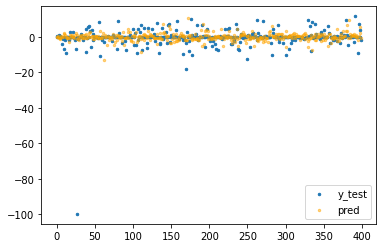

In [ ]:
x_ax = range(len(X_test))

plt.scatter(x_ax, y_test,  s=6, label="y_test")
plt.scatter(x_ax, pred, s=6, label="pred",c="orange", alpha=0.5)

plt.legend()
plt.show()

In [ ]:
X = dataset[['accelerometer_reading_x_0', 'accelerometer_reading_y_0', 'accelerometer_reading_z_0',
             'gyroscope_reading_phi_0','gyroscope_reading_theta_0', 'gyroscope_reading_psi_0']].values
Y = dataset[['phi_change']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
640/640 [==============================] - 1s 2ms/step - loss: 17.4591 - mean_squared_error: 17.4591 - val_loss: 14.8529 - val_mean_squared_error: 14.8529
Epoch 2/25
640/640 [==============================] - 1s 1ms/step - loss: 16.7818 - mean_squared_error: 16.7818 - val_loss: 14.5331 - val_mean_squared_error: 14.5331
Epoch 3/25
640/640 [==============================] - 1s 1ms/step - loss: 15.8144 - mean_squared_error: 15.8144 - val_loss: 14.3592 - val_mean_squared_error: 14.3592
Epoch 4/25
640/640 [==============================] - 1s 1ms/step - loss: 15.0388 - mean_squared_error: 15.0388 - val_loss: 13.4934 - val_mean_squared_error: 13.4934
Epoch 5/25
640/640 [==============================] - 1s 1ms/step - loss: 15.0078 - mean_squared_error: 15.0078 - val_loss: 13.5697 - val_mean_squared_error: 13.5697
Epoch 6/25
640/640 [==============================] - 1s 1ms/step - loss: 15.7215 - mean_squared_error: 15.7215 - val_loss: 13.6365 - val_mean_squared_error: 13.6365
Epoc

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print('MSE:',(mean_squared_error(y_train,pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print('MSE:', (mean_squared_error(y_test,pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

MSE: 16.713234252917008
RMSE: 4.088182267575286
MSE: 36.313951187037425
RMSE: 6.02610580616018


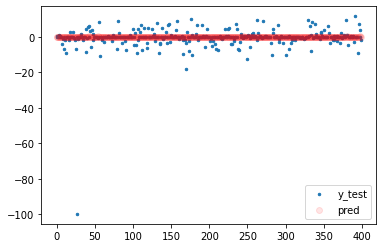

In [ ]:
x_ax = range(len(X_test))

plt.scatter(x_ax, y_test,  s=6, label="y_test")
plt.scatter(x_ax, pred, label="pred",c="red",alpha = 0.1)

plt.legend()
plt.show()

In [ ]:
X = dataset[['accelerometer_reading_x_0', 'accelerometer_reading_y_0', 'accelerometer_reading_z_0',
             'gyroscope_reading_phi_0','gyroscope_reading_theta_0', 'gyroscope_reading_psi_0']].values
Y = dataset[['phi_change']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
640/640 [==============================] - 1s 948us/step - loss: 17.0660 - mean_squared_error: 17.0660 - val_loss: 15.3114 - val_mean_squared_error: 15.3114
Epoch 2/25
640/640 [==============================] - 1s 966us/step - loss: 16.5189 - mean_squared_error: 16.5189 - val_loss: 15.7089 - val_mean_squared_error: 15.7089
Epoch 3/25
640/640 [==============================] - 1s 1ms/step - loss: 15.5962 - mean_squared_error: 15.5962 - val_loss: 16.3170 - val_mean_squared_error: 16.3170
Epoch 4/25
640/640 [==============================] - 1s 841us/step - loss: 14.8532 - mean_squared_error: 14.8532 - val_loss: 14.6384 - val_mean_squared_error: 14.6384
Epoch 5/25
640/640 [==============================] - 1s 838us/step - loss: 14.9604 - mean_squared_error: 14.9604 - val_loss: 23.7680 - val_mean_squared_error: 23.7680
Epoch 6/25
640/640 [==============================] - 1s 856us/step - loss: 15.0480 - mean_squared_error: 15.0480 - val_loss: 19.1132 - val_mean_squared_error: 19

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print('MSE:',(mean_squared_error(y_train,pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print('MSE:', (mean_squared_error(y_test,pred)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred)))

MSE: 17.01096268742677
RMSE: 4.124434832486358
MSE: 36.3378856038799
RMSE: 6.028091373219213


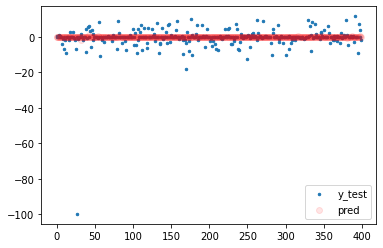

In [ ]:
x_ax = range(len(X_test))

plt.scatter(x_ax, y_test,  s=6, label="y_test")
plt.scatter(x_ax, pred, label="pred",c="red",alpha = 0.1)

plt.legend()
plt.show()

In [ ]:
#code from: https://keras.io/api/models/model/

import tensorflow as tf

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(100, activation='relu')
    self.dense2 = tf.keras.layers.Dense(50, activation='relu')
    self.dense3 = tf.keras.layers.Dense(25, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

model = MyModel()



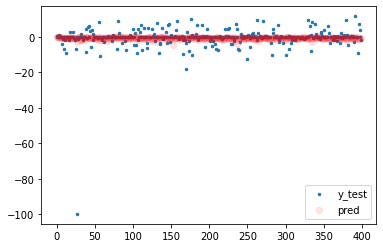

In [ ]:
def draw(xtest,ytest,pred):
   x_ax = range(len(xtest))
   plt.scatter(x_ax,ytest,s=6,label="y_test")
   plt.scatter(x_ax, pred, label="pred",c="red",alpha = 0.1)
   plt.legend()
   plt.show()


draw(X_test,y_test,pred)



In [ ]:
def multipleGraph(X_train,t_train)

    #need to be add model
    model1=
    model2=
    model3=


    # maybe use?

    #svm = LinearSVC(tol=1e-3, random_state=0)
    #logreg =  LogisticRegression(random_state=0)
    #knn =  neighbors.KNeighborsClassifier() 
    # nb = GaussianNB() 
    #ridge = linear_model.Ridge()
    #perceptron = Perceptron(tol=1e-3, random_state=0)
    #sgd = linear_model.SGDRegressor()
    #ela = linear_model.ElasticNet()
    #lasso =linear_model.Lasso()


    models=[model1,model2,model3]
    #models = [svm, logreg, knn, nb,ridge,perceptron,sgd,ela,lasso]


    names=["model1","model2","model3"]
    #names = ["SVM", "Logistic Reg", "kNN", "Naive Bayes","Ridge", "Perceptron","SGD","Elastic Net","Lasso "]

    for name, model in zip(names,models)
        #print(name)
        clf = model.fit(X_train, t_train)

        train_score = clf.score(X_train, t_train)
        test_score = clf.score(X_test, t_test)
        print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

        y_train = clf.predict(X_train)
        y_test = clf.predict(X_test)

        plt.figure(figsize=(12,4)) 
        plt.subplot(121)

        plt.plot(t_train, 'ro' ,y_train,'bx')

        plt.subplot(122)
        plt.plot(t_test, 'ro' ,y_test,'bx')

        plt.suptitle(name)
